# Get base and duplicate sectors (real and imaginary) results for modal cyclic symmetry {#ref_basic_cyclic}

This example shows how to extract results from a modal cyclic symmetry
model.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples

Create the model and display the state of the result.


In [2]:
model = dpf.Model(examples.find_simple_cyclic())
print(model)

DPF Model
------------------------------
Modal analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  51 nodes 
  4 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 30 
Cumulative     Frequency (Hz) LoadStep       Substep        Harmonic index  
1              670386.325235  1              1          

# Get base and duplicate sectors displacement results

By default, the result providers (stress, displacement, and so on) will
return results for base and duplicate sectors for a cyclic symmetry
model.


In [3]:
# Create displacement operator
u_cyc = model.results.displacement.on_all_time_freqs()
fields = u_cyc.outputs.fields_container()

The output fields container print displays the organization of the
different fields in the container. The label \"base_sector\" gives
access to base sectors results with base_sector=1 and duplicate sector
with base_sector=0 for all modes. The print also displays that there is
no duplicate sectors for the first 6 modes. Indeed, modes with harmonic
index 0 have 0.0 displacement, stresses\... on duplicate sectors.


DPF displacement(s)Fields Container
  with 48 field(s)
  defined on labels: base_sector time 

  with:
  - field 0 {base_sector:  1, time:  1} with Nodal location, 3 components and 51 entities.
  - field 1 {base_sector:  1, time:  2} with Nodal location, 3 components and 51 entities.
  - field 2 {base_sector:  1, time:  3} with Nodal location, 3 components and 51 entities.
  - field 3 {base_sector:  1, time:  4} with Nodal location, 3 components and 51 entities.
  - field 4 {base_sector:  1, time:  5} with Nodal location, 3 components and 51 entities.
  - field 5 {base_sector:  1, time:  6} with Nodal location, 3 components and 51 entities.
  - field 6 {base_sector:  1, time:  7} with Nodal location, 3 components and 51 entities.
  - field 7 {base_sector:  1, time:  8} with Nodal location, 3 components and 51 entities.
  - field 8 {base_sector:  1, time:  9} with Nodal location, 3 components and 51 entities.
  - field 9 {base_sector:  1, time:  10} with Nodal location, 3 components and

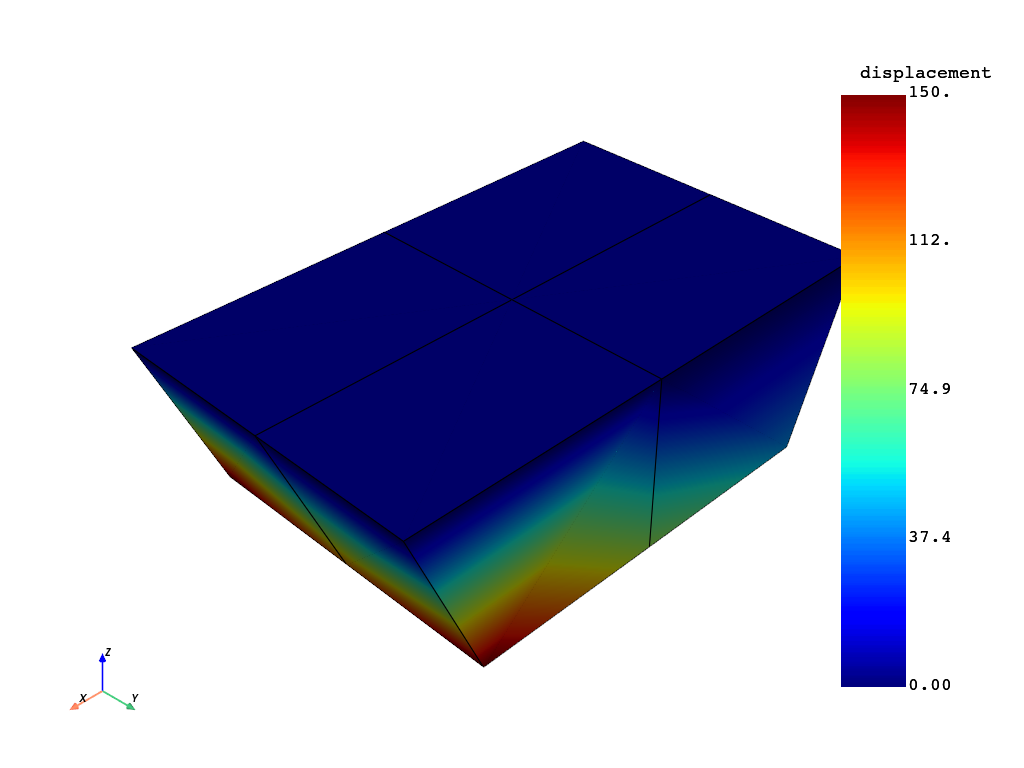

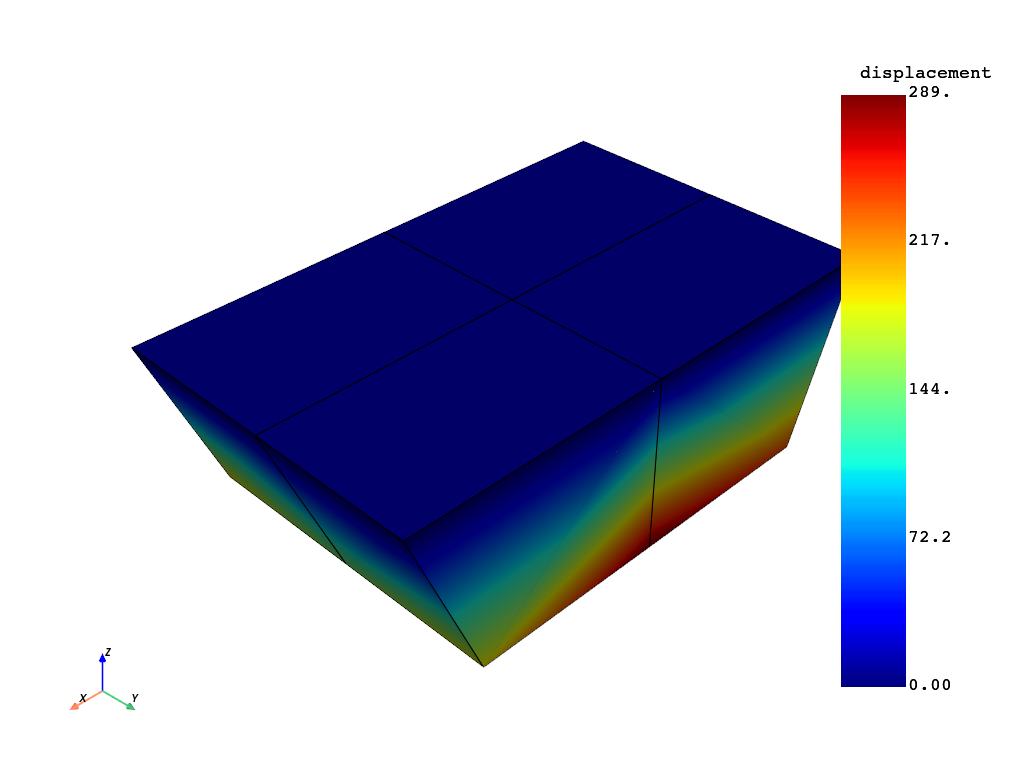

In [4]:
print(fields)
print(model.metadata.time_freq_support)

# plot mode 7 base sector (real) result
mode_7_base = fields.get_field({"base_sector": 1, "time": 7})
model.metadata.meshed_region.plot(mode_7_base)

# plot mode 7 duplicate sector (imaginary) result
mode_7_duplicate = fields.get_field({"base_sector": 0, "time": 7})
model.metadata.meshed_region.plot(mode_7_duplicate)

# Get displacement results on the first sector with a cyclic phase

`ansys.dpf.result.cyclic_expanded_displacement`{.interpreted-text
role="class"} gives access to all cyclic expansion configuration. By
default all sectors will be expanded. The cyclic phase (in degree) can
be changed with the phi argument.


DPF  Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  7} with Nodal location, 3 components and 51 entities.



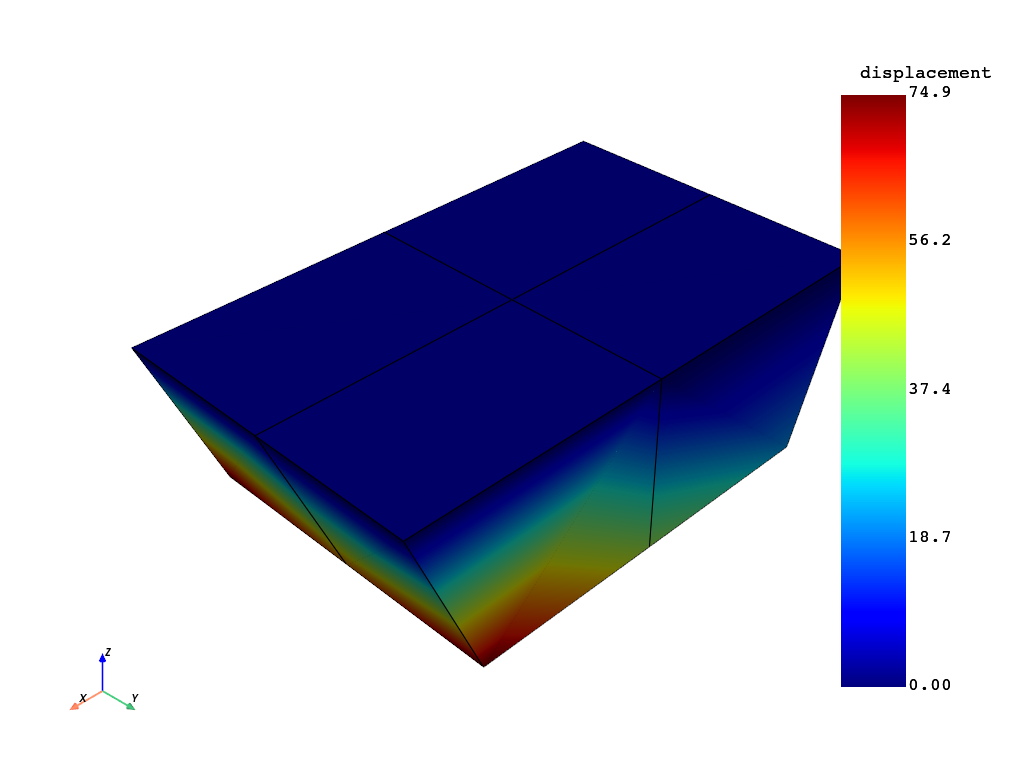

DPF  Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  7} with Nodal location, 3 components and 51 entities.



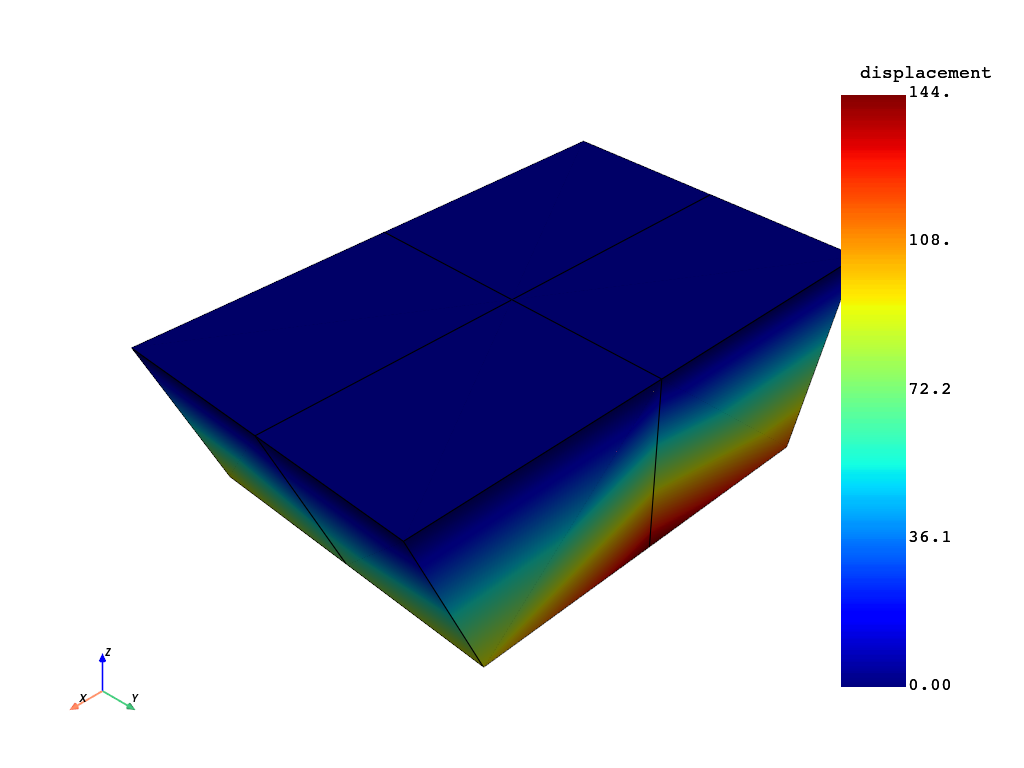

DPF  Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  7} with Nodal location, 3 components and 51 entities.



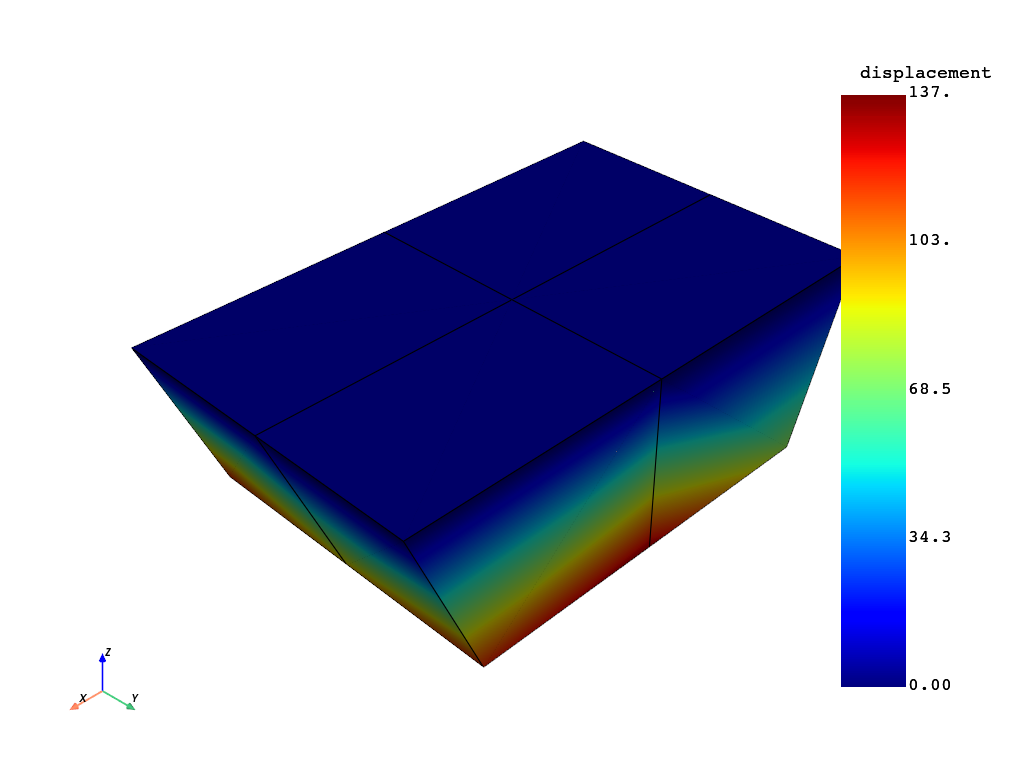

In [5]:
u_cyc = dpf.operators.result.cyclic_expanded_displacement(
    streams_container=model.metadata.streams_provider,
    sectors_to_expand=[0],
    time_scoping=[7],
    phi=0.0,
)
# # get the mesh expanded on the first sector for consistency between results and mesh
mesh_provider = model.metadata.mesh_provider
mesh_provider.inputs.read_cyclic(2)  # read_cyclic=2 allows to expand cyclic result
mesh_provider.connect(18, [0])  # connect the sectors_to_expand
mesh = mesh_provider.outputs.mesh()

mode_7_base = u_cyc.outputs.fields_container()
print(mode_7_base)
mesh.plot(mode_7_base[0])

# a phase phi=90° is equivalent to returning the duplicate sector results:
u_cyc.inputs.phi(90.0)
mode_7_duplicate = u_cyc.outputs.fields_container()
print(mode_7_duplicate)
mesh.plot(mode_7_duplicate[0])

# with phi=45°
u_cyc.inputs.phi(45.0)
mode_7_45 = u_cyc.outputs.fields_container()
print(mode_7_45)
mesh.plot(mode_7_45[0])

# Get nodal stress results on the first sector with a cyclic phase


DPF  Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  7} with Nodal location, 6 components and 51 entities.



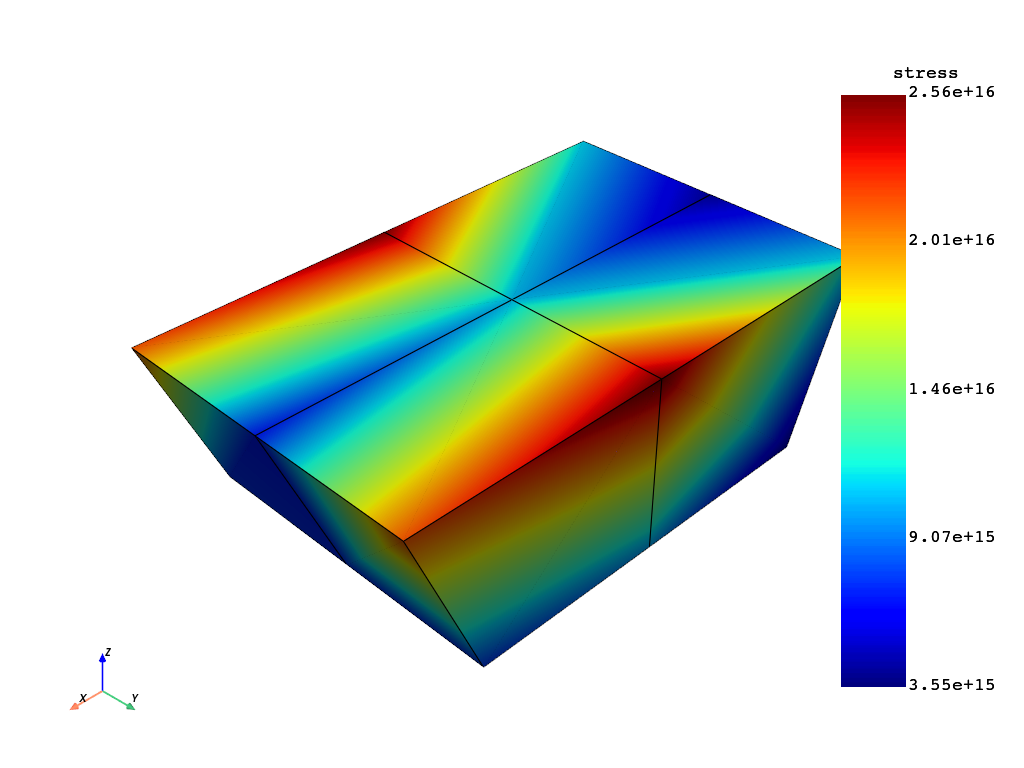

In [6]:
s_cyc = dpf.operators.result.cyclic_expanded_stress(
    streams_container=model.metadata.streams_provider,
    sectors_to_expand=[0],
    time_scoping=[7],
    phi=45.0,
    requested_location=dpf.locations.nodal,
)

s_7_45 = s_cyc.outputs.fields_container()
print(s_7_45)
mesh.plot(s_7_45[0])

# Get elemental_nodal stress results on the first sector with a cyclic phase

Elemental nodal is the default result location for stress and strain.


DPF  Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  7} with ElementalNodal location, 6 components and 4 entities.

DPF  Fields Container
  with 1 field(s)
  defined on labels: time 

  with:
  - field 0 {time:  7} with Elemental location, 6 components and 4 entities.



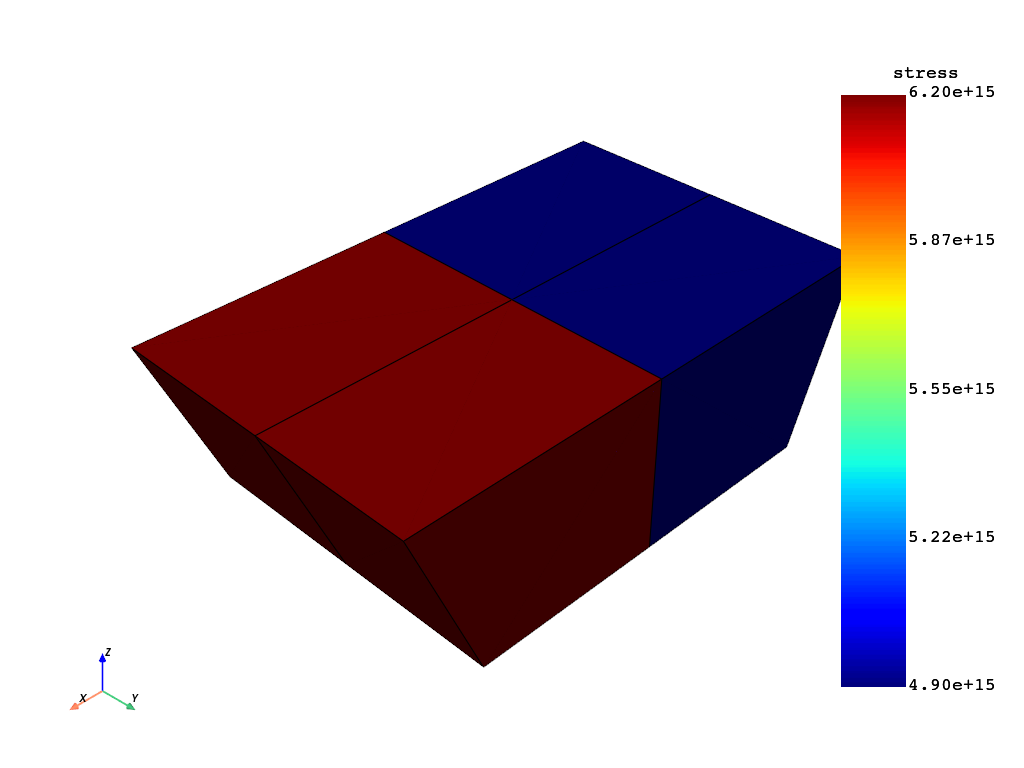

In [7]:
s_cyc = dpf.operators.result.cyclic_expanded_stress(
    streams_container=model.metadata.streams_provider,
    sectors_to_expand=[0],
    time_scoping=[7],
    phi=45.0,
)

s_7_45 = s_cyc.outputs.fields_container()
print(s_7_45)

# To average the result for each element
to_elemental = dpf.operators.averaging.to_elemental_fc(s_cyc)
s_7_45 = to_elemental.outputs.fields_container()
print(s_7_45)
mesh.plot(s_7_45[0])

# Get nodal stress results expanded


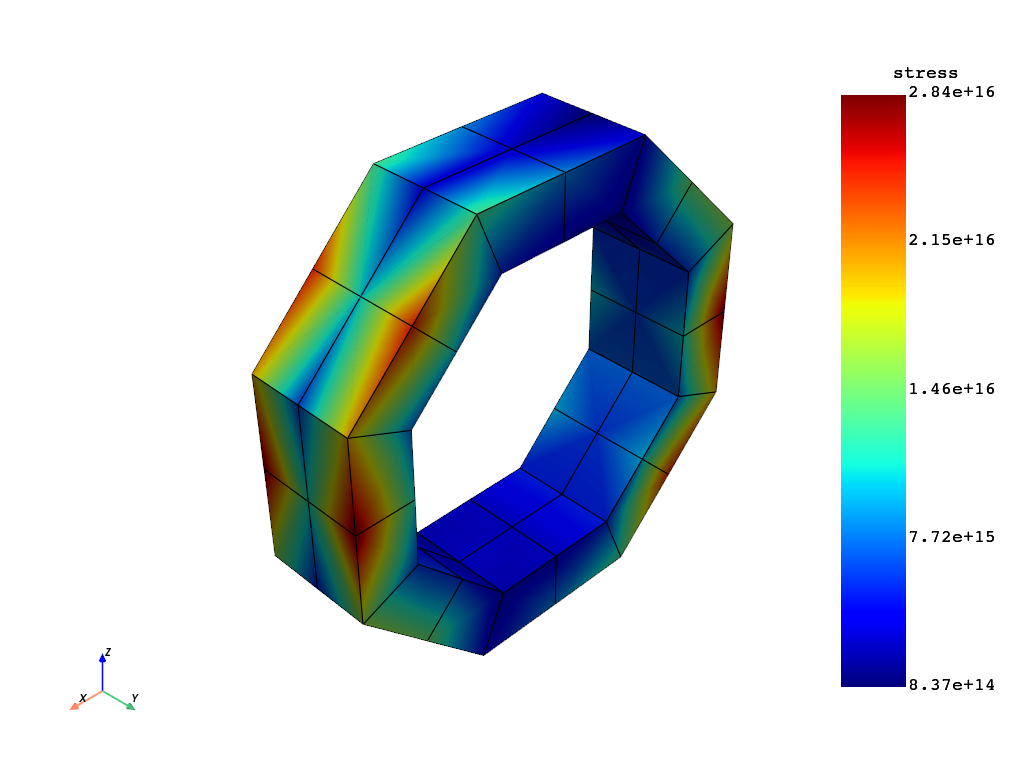

In [8]:
s_cyc = dpf.operators.result.cyclic_expanded_stress(
    streams_container=model.metadata.streams_provider,
    time_scoping=[7],
    requested_location=dpf.locations.nodal,
)

mesh_provider = model.metadata.mesh_provider
mesh_provider.inputs.read_cyclic(2)  # read_cyclic=2 allows to expand cyclic result
mesh = mesh_provider.outputs.mesh()
s = s_cyc.outputs.fields_container()

mesh.plot(s[0])